In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import fetch_california_housing


In [4]:
df=fetch_california_housing()

In [11]:
import seaborn as sns

In [11]:
import seaborn as sns

In [10]:
df

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [18]:
dataset=pd.DataFrame(df.data)

In [19]:
dataset

,0,1,2,3,4,5,6,7
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [21]:
dataset.head()

,0,1,2,3,4,5,6,7
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [24]:
dataset.columns=df.feature_names

In [25]:
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [26]:
x=dataset
y=df.target

In [27]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.30, random_state=42)

In [29]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [30]:
X_train=scaler.fit_transform(X_train)

In [31]:
X_test=scaler.transform(X_test)

In [12]:
from sklearn.linear_model import Ridge

In [13]:
from sklearn.model_selection import GridSearchCV

In [14]:
ridge_regression=Ridge()

In [16]:
ridge_regression

Ridge()

In [34]:
parameters={'alpha':[1,2,3,5,10,15,20]}
ridcv=GridSearchCV(ridge_regression,parameters,scoring='neg_mean_squared_error',cv=5)
ridcv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1, 2, 3, 5, 10, 15, 20]},
             scoring='neg_mean_squared_error')

In [37]:
print(ridcv.best_params_)

{'alpha': 5}


In [38]:
print(ridcv.best_score_)

-0.5268179966861515


In [40]:
ridcv_pred=ridcv.predict(X_test)

C:\Users\Vandana\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


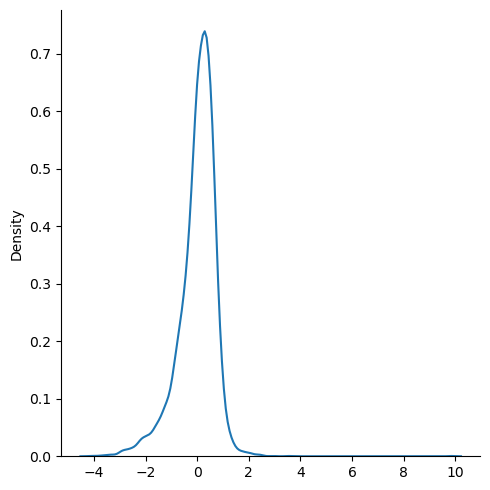

In [42]:
sns.displot(ridcv_pred-y_test,kind='kde')

In [43]:
from sklearn.metrics import r2_score

In [45]:
score=r2_score(ridcv_pred,y_test)

In [46]:
score

0.3438394544140463

In [47]:
from sklearn.linear_model import Lasso

In [48]:
lasso=Lasso()

In [53]:
parameters={'alpha':[1,2,3,5,10,15,20]}
lassocv=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)
lassocv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1, 2, 3, 5, 10, 15, 20]},
             scoring='neg_mean_squared_error')

In [54]:
print(lassocv.best_params_)


{'alpha': 1}


In [55]:
print(lassocv.best_score_)

-1.3400019579636542


In [60]:
lassocv_pred=lassocv.predict(X_test)

In [61]:
from sklearn.metrics import r2_score

C:\Users\Vandana\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


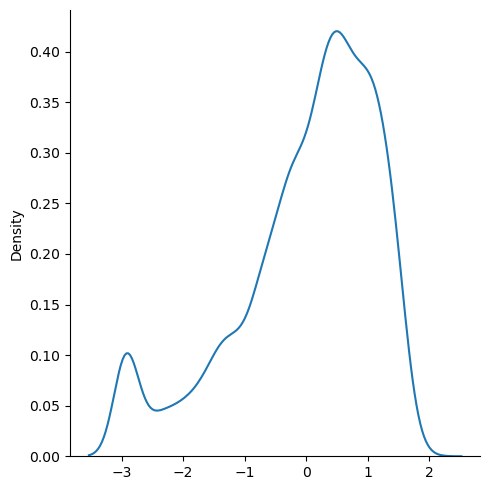

In [62]:
sns.displot(lassocv_pred-y_test,kind='kde')

In [63]:
score1=r2_score(lassocv_pred,y_test)

In [64]:
score1

0.0